In [2]:
#import all the dependencies
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read the csv files to view the data
google_apps = pd.read_csv("googleplaystore.csv")
google_apps.shape

(10841, 13)

# Data Cleaning

In [6]:
#Check for number of apps in total
no_apps = google_apps["App"].nunique()
print(f"Total number of unique apps: {no_apps}")

#dropping all the duplicate apps from the dataframe
google_apps.drop_duplicates(subset = "App", inplace = True)
google_apps

#size of the apps are not consistent so convert all to same measure and replace any other values with nan and ""
google_apps["Size"] = google_apps["Size"].apply(lambda x: str(x).replace(",", "") if "," in str(x) else x)
google_apps["Size"] = google_apps["Size"].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
google_apps["Size"] = google_apps["Size"].apply(lambda x: str(x).replace("Varies with device", "NAN") if "Varies with device" in str(x) else x)
google_apps["Size"] = google_apps["Size"].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

#convert all the sizes to float
# google_apps = google_apps.drop([10472])
google_apps["Size"] = google_apps["Size"].apply(lambda x:float(x))

#Install column has '+' sign so removing that will help easy computation
google_apps["Installs"] = google_apps["Installs"].apply(lambda x:x.replace("+","")if "+" in str(x) else x)
google_apps["Installs"] = google_apps["Installs"].apply(lambda x: x.replace(",","") if "," in str(x) else x)
google_apps["Installs"] = google_apps["Installs"].apply(lambda x:float(x))

#Make the price column consistent by removing the '$' symbol and replacing "Free" with 0
google_apps["Price"] = google_apps["Price"].apply(lambda x: x.replace("Free",0) if "Free" in str(x) else x)
google_apps["Price"] = google_apps["Price"].apply(lambda x:x.replace("$","") if "$" in str(x)else x)
google_apps["Price"] = google_apps["Price"].apply(lambda x: float(x))
 
google_apps["Price"].dtype    


Total number of unique apps: 9659


dtype('float64')

# Exploratory Analysis

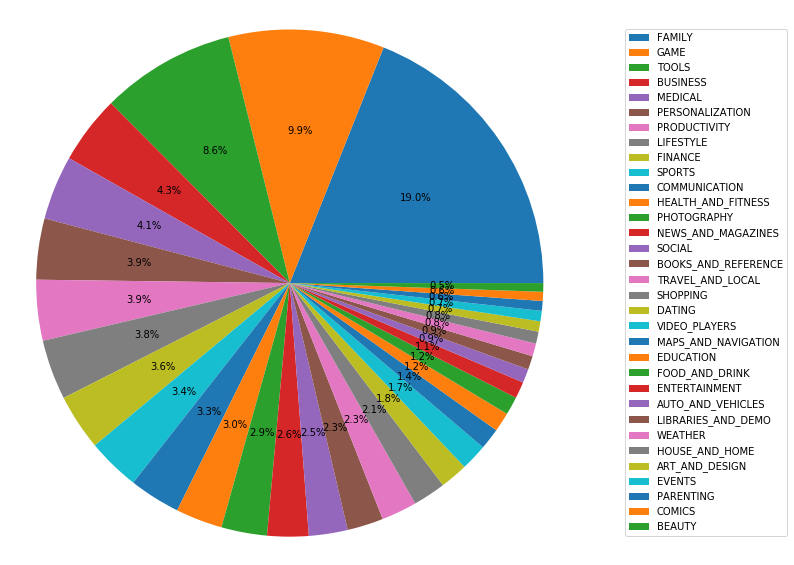

In [7]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
number_of_apps = google_apps["Category"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()

Number of installs in family: 4427941505.0
Number of installs in Game: 13878924415.0
Number of installs in Tools: 8001771915.0


D:\Su_Data_Downloads\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


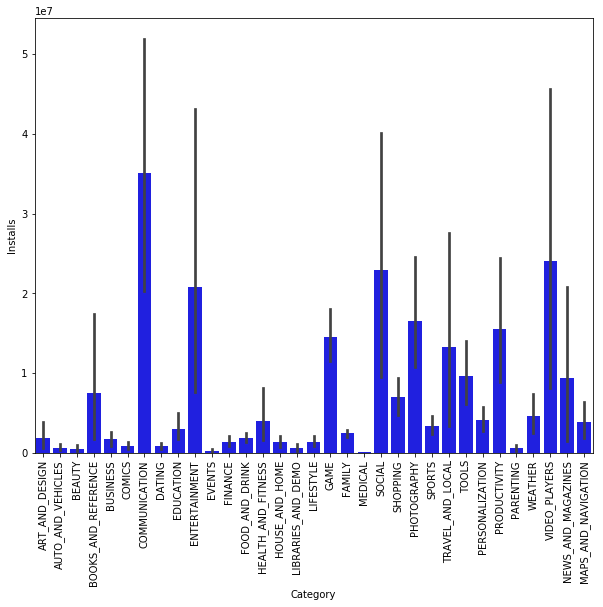

Top 3 categories in terms of number of installations are: Communication,Video Players and Entertainment


In [29]:
#looking at the number of installs in the top 5 categories and their geners
no_of_apps_category = google_apps["Category"].value_counts()
no_of_apps_category[0:5]
number_of_installs = google_apps["Installs"].groupby(google_apps["Category"]).sum()
print(f"Number of installs in family: {number_of_installs.loc['FAMILY']}")
print(f"Number of installs in Game: {number_of_installs.loc['GAME']}")
print(f"Number of installs in Tools: {number_of_installs.loc['TOOLS']}")

#Plotting a simple bar graph to represent the number of installs in each category
plt.figure(figsize=(10,8))
sns.barplot(x="Category", y="Installs", data=google_apps,
            label="Total Installs", color="b")
plt.xticks(rotation=90)
plt.show()
print("Top 3 categories in terms of number of installations are: Communication,Video Players and Entertainment")


D:\Su_Data_Downloads\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


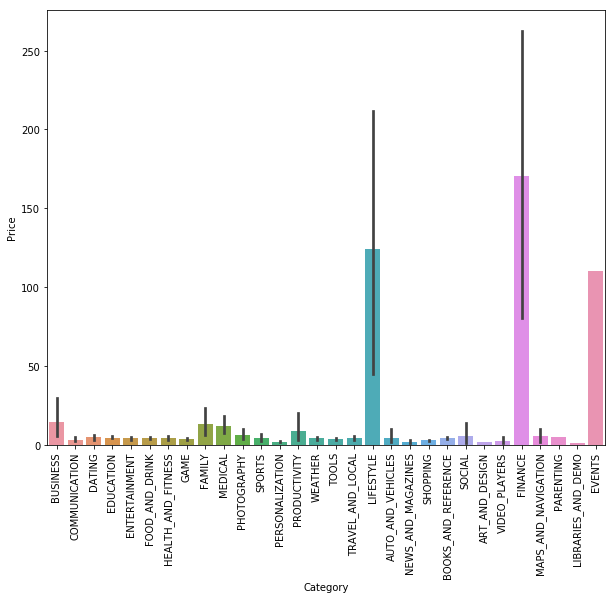

In [28]:
#Let's look at why family even though has lot of apps does not have the highest number of installs. Price could be one of the factors
paid_apps = google_apps[google_apps["Price"] != 0.0]

paid_family_apps = paid_apps[paid_apps["Category"]=="FAMILY"]
paid_family_apps.count()

paid_communications_apps = paid_apps[paid_apps["Category"]=="COMMUNICATION"]
paid_communications_apps.count()

#Let's visualize this in the form of a simple bar graph
plt.figure(figsize=(10,8))
sns.barplot(x="Category", y="Price", data=paid_apps,
            label="Total Paid Apps in Each Category")
plt.xticks(rotation=90)
plt.show()


4.173243045387998


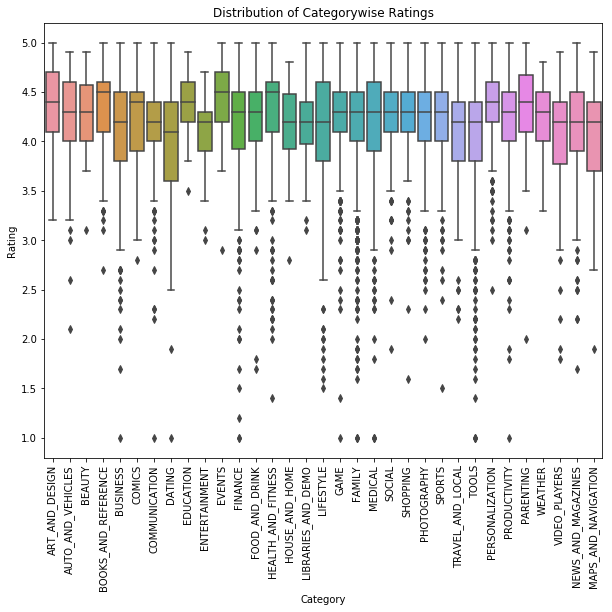

In [7]:
#Ratings of the apps over various categories
avg_rating = google_apps["Rating"].mean()
print(avg_rating)
plt.figure(figsize=(10,8))
sns.boxplot('Category','Rating',data=google_apps)
plt.title("Distribution of Categorywise Ratings")
plt.ylabel("Rating")
plt.xlabel("Category")
plt.xticks(rotation=90)
# plt.savefig('data_images/plot3a_income.png',bbox_inches='tight')
plt.show();

In [8]:
#Paid Vs free and the number of installs
installs_greater_1000 = google_apps[google_apps["Installs"]>1000]
installs_greater_1000 = installs_greater_1000.sort_values(['Price'])

<Figure size 1440x1440 with 0 Axes>

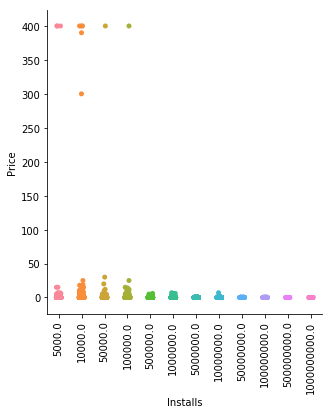

In [9]:
plt.figure(figsize=(20,20))
sns.catplot(x="Installs", y="Price",data=installs_greater_1000);
plt.xticks(rotation=90)
# plt.ytick.direction('out')
plt.show()

In [10]:
#take a deeper look at the apps priced more than $100
expensive_apps = google_apps[google_apps["Price"]>100]
expensive_apps["Installs"].groupby(expensive_apps["App"]).sum()

App
BP Fitness Lead Scanner                   1.0
EP Cook Book                              0.0
Eu Sou Rico                               0.0
I AM RICH PRO PLUS                     1000.0
I Am Rich                             10000.0
I Am Rich Premium                     50000.0
I Am Rich Pro                          5000.0
I am Rich                              5000.0
I am Rich Plus                        10000.0
I am Rich!                             1000.0
I am extremely Rich                    1000.0
I am rich                            100000.0
I am rich (Most expensive app)         1000.0
I am rich VIP                         10000.0
I am rich(premium)                     5000.0
I'm Rich - Trump Edition              10000.0
I'm Rich/Eu sou Rico/أنا غني/我很有錢         0.0
cronometra-br                             0.0
most expensive app (H)                  100.0
💎 I'm rich                            10000.0
Name: Installs, dtype: float64

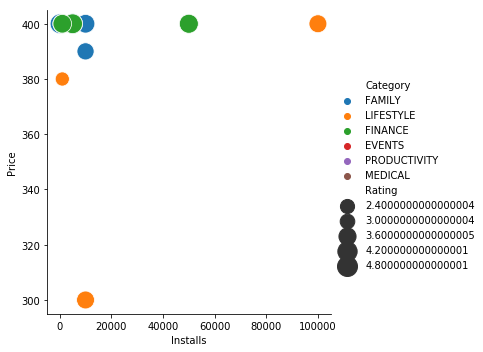

In [11]:
#number of installs Vs price Vs Category
sns.relplot(x="Installs", y="Price", hue="Category", size="Rating",
            sizes=(200, 400), alpha=1,
            height=5, data=expensive_apps)
plt.show()

# Conclusions


In [37]:
print(f"The Top three category of Apps based on the number of Apps are")
print(f"   - Family")
print(f"   - Game")
print(f"   - Tool")

print(f"The bottom three category of Apps based on the number of Apps are")
print(f"   - Parenting")
print(f"   - Comics")
print(f"   - Beauty")

print(f"This is not the case when we look at the number of intalls. Based on number of installs, Communication,Video players and entertainment are the top 3 categories")
print(f"To find out why, I looked at the price of paid apps in each category and clearly, communication was priced less than the family apps. This could be one of the reasons")

print(f"-----------------------------------------------------------------------------------------------------------------------------")
print(f"The Average rating of the apps across all the categories is 4.17")
print(f"-----------------------------------------------------------------------------------------------------------------------------")
print(f"Users tend to download more free apps compared to paid apps. This being said, there are people who are willing to pay more than $100 for an app")
print(f"-----------------------------------------------------------------------------------------------------------------------------")

print(f"Based on the data, Users tend to buy apps which are priced $1 - $30 compared to other expensive apps")
print(f"-----------------------------------------------------------------------------------------------------------------------------")
print(f"There are 20 apps which cost above $100. Finance, Lifestyle and family being the top 3 categories.")
print(f"-----------------------------------------------------------------------------------------------------------------------------")



print(f"Among the most expensive apps, 'I am Rich' is the most popular app with the most number of installs")


The Top three category of Apps based on the number of Apps are
   - Family
   - Game
   - Tool
The bottom three category of Apps based on the number of Apps are
   - Parenting
   - Comics
   - Beauty
This is not the case when we look at the number of intalls. Based on number of installs, Communication,Video players and entertainment are the top 3 categories
To find out why, I looked at the price of paid apps in each category and clearly, communication was priced less than the family apps. This could be one of the reasons
-----------------------------------------------------------------------------------------------------------------------------
The Average rating of the apps across all the categories is 4.17
-----------------------------------------------------------------------------------------------------------------------------
Users tend to download more free apps compared to paid apps. This being said, there are people who are willing to pay more than $100 for an app
------------